**UTS ANALISIS DATA MEDIA SOSIAL**


**Amanda Gozali - 6162001169**

#Membaca Data

In [ ]:
import pandas as pd
import numpy as np
url = 'https://docs.google.com/spreadsheets/d/1lN3x5lmwCHPph0OatZqouRJVeyuRp16t1DqpqqkUcGs/gviz/tq?tqx=out:csv&sheet=Sheet1'
df = pd.read_csv(url)

In [ ]:
df.head(20)

No                    Brand  Rating  \
0    1       Pizza Hut Delivery       3   
1    2               Mcdonald's       1   
2    3                      KFC       5   
3    4            Burger Bangor       3   
4    5              Burger King       5   
5    6                      CFC       3   
6    7                  Dcrepes       4   
7    8                      A&W       5   
8    9                Yoshinoya       2   
9   10                   Hokben       4   
10  11                  Solaria       5   
11  12           Domino's Pizza       1   
12  13            Marugame Udon       3   
13  14        Kebuli Ijab Qabul       4   
14  15                Carl's JR       3   
15  16                 Lotteria       4   
16  17  Nasi Kulit Malam Minggu       4   
17  18                 Wingstop       3   
18  19                   Gokana       1   
19  20            Golden Lamian       5   

                                          Review Text  \
0   rose pizza, rotinya masih mentah yang bagian d...   
1   Saya pesan setau saya gambarnya pake nasi. Kal...   
2   Ini mah nggak usah diragukan, udah langganan j...   
3      Ukuran kecil untuk harga segitu. Tapi rasa ok.   
4   enak bumbu madura nya, ayamnya pun juicy ga ke...   
5                                nasinya keras kering   
6   waktu pickup kita harus bilang dulu ke mas/mba...   
7   packaging rapi dan aman. terima kasih karyawan...   
8                             pesan apa yg datang apa   
9   Rasa enak tp gak nyangka porsinya mini banget ...   
10  enak rasanya dan bersih penyajiannya , terimak...   
11                   udh pese chili sauce malah gaada   
12  Udonnya terlalu lembek. Tidak seperti biasanya...   
13             Rasa oke, porsi kurang dan harga mahal   
14           daging burger nya dingin, macam ga fresh   
15                                        Rasa enak     
16  Untuk bumbu, lumayan enak (paru dan kulit) wal...   
17  Bumbunya terlalu banyak jadi eneug. Rasanya an...   
18  aku tu pesen curry ramen yg dtang ntah rasaa a...   
19  Enak banget, cuma kecewanya order level pedas ...   

                                               Source  
0   https://gofood.co.id/en/bandung/restaurant/piz...  
1   https://gofood.co.id/id/bandung/restaurant/mcd...  
2   https://gofood.co.id/en/bandung/restaurant/kfc...  
3   https://gofood.co.id/en/bandung/restaurant/bur...  
4   https://gofood.co.id/id/bandung/restaurant/bur...  
5   https://gofood.co.id/en/bandung/restaurant/cfc...  
6   https://gofood.co.id/en/bandung/restaurant/dcr...  
7   https://gofood.co.id/id/bandung/restaurant/a-w...  
8   https://gofood.co.id/bandung/restaurant/yoshin...  
9   https://gofood.co.id/en/bandung/restaurant/hok...  
10  https://gofood.co.id/id/bandung/restaurant/sol...  
11  https://gofood.co.id/en/bandung/restaurant/dom...  
12  https://gofood.co.id/id/bandung/restaurant/mar...  
13  https://gofood.co.id/en/bandung/restaurant/keb...  
14  https://gofood.co.id/id/bandung/restaurant/car...  
15  https://gofood.co.id/id/bandung/restaurant/lot...  
16  https://gofood.co.id/id/bandung/restaurant/nas...  
17  https://gofood.co.id/id/bandung/restaurant/win...  
18  https://gofood.co.id/en/bandung/restaurant/gok...  
19  https://gofood.co.id/en/bandung/restaurant/gol...

In [ ]:
len(df)

250

## Preprocessing



In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

Reviews are the main information in this dataset. If any row is missing the review, we don’t need that row.

In [ ]:
df = df[~df['Review Text'].isnull()]

In [ ]:
len(df)

250

Reviews may contain a lot of special characters that are not helpful for any analysis. It’s good to clean them in the beginning.

In [ ]:
def clean(txt):
    txt = txt.str.replace("()", "")
    txt = txt.str.replace('(<a).*(>).*()', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txt
    
df['Review Text'] = clean(df['Review Text'])

<ipython-input-7-a2bf630cc8ed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace("()", "")
<ipython-input-7-a2bf630cc8ed>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(<a).*(>).*()', '')
<ipython-input-7-a2bf630cc8ed>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&amp)', '')
<ipython-input-7-a2bf630cc8ed>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&gt)', '')
<ipython-input-7-a2bf630cc8ed>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&lt)', '')
<ipython-input-7-a2bf630cc8ed>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(\xa0)', ' ')


Converting to lower case is necessary. Otherwise, it will consider the same word with an uppercase as a different word. Like ‘me’ and ‘Me’ will be considered as different words. We don’t want that.

In [ ]:
df['review1'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review1'].head()

0    rose pizza, rotinya masih mentah yang bagian d...
1    saya pesan setau saya gambarnya pake nasi. kal...
2    ini mah nggak usah diragukan, udah langganan j...
3       ukuran kecil untuk harga segitu. tapi rasa ok.
4    enak bumbu madura nya, ayamnya pun juicy ga ke...
Name: review1, dtype: object

This step is to remove the punctuations. Because of punctuation, a word might be treated differently than it originally is. For example ‘use’ and ‘use:’ will become different words because of punctuation.

In [ ]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

<ipython-input-9-13026600a3d1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review1'] = df['review1'].str.replace('[^\w\s]', '')


0    rose pizza rotinya masih mentah yang bagian da...
1    saya pesan setau saya gambarnya pake nasi kalo...
2    ini mah nggak usah diragukan udah langganan ju...
3         ukuran kecil untuk harga segitu tapi rasa ok
4    enak bumbu madura nya ayamnya pun juicy ga kering
Name: review1, dtype: object

As you can see, the punctuations are gone! In line 157, there was punctuation in ‘grandsons’. We will eventually get rid of the ‘s’s in the ‘grandsons’ in the lemmatization or Stemming section in a bit.

**Removing Stopwords**

Stopwords are some grammatical or binding words like ‘is’, ‘the’, ‘and’, ‘so’, ‘my’ etc. These are the words that appear very frequently. But may not add any value to the analysis. Although it is arguable. Some people think they are important at times. In some artificial intelligence projects, they may be important but for this example, stopwords won’t be necessary.

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
data = stop_factory.get_stop_words()+more_stopword
stop = stopwords.words('indonesian')+data
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review1'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                   rose pizza rotinya mentah dalamnya
1    pesan setau gambarnya pake nasi kalo ga pake d...
2                  mah diragukan udah langganan wkwkwk
3                                  ukuran harga segitu
4        enak bumbu madura nya ayamnya juicy ga kering
Name: review1, dtype: object

In [ ]:
stop

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

See, all the stopwords are gone!

**Remove the Rare Words**

There are some words that appeared only once. Those rare words do not add anything to it. So we can safely discard them. First, find the frequency of each word and then find out the words that appeared only once.

In [ ]:
freq = pd.Series(' '.join(df['review1']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['kosan',
 'cuyyyyyyy',
 'pengecap',
 'menerka',
 'valentine',
 'honey',
 'lokasinya',
 'diskon',
 '33k',
 'quote',
 'membuatnya',
 'gapapalah',
 'rawit',
 'kursinya',
 'menusuk',
 'setara',
 'nusuk',
 'resep',
 'andalan',
 'm',
 'grabfood',
 'melimpah',
 'pelajaran',
 'malas',
 'keleluasaan',
 'side',
 'aporisma',
 'sunny',
 'kalinya',
 'keliru',
 'izin',
 'akibatnya',
 'nyampe',
 'mehong',
 'merica',
 'rose',
 'nilai',
 'dlm',
 'dimsum',
 'setan',
 'antri',
 'gacoan',
 'kemahalan',
 'hrg',
 'tunautk',
 'tuna',
 'ky',
 'mentaiutk',
 'lembaran',
 'timunplus',
 'kyuri',
 'sushiselada',
 'dibganti',
 'sushitrus',
 'seporsinya',
 'pangsitnya',
 'suirnya',
 'mumpung',
 'pengap',
 'terurus',
 'sundae',
 'scoop',
 'membeli',
 'kalap',
 'musim',
 'matahari',
 'teriknya',
 'ditengah',
 'kepanasan',
 'strong',
 'takaran',
 'xxl',
 'payday',
 'sushiroti',
 'susunan',
 '2x',
 'ig',
 'kerumunan',
 'mengurai',
 'managemen',
 'perjuangan',
 'membludak',
 'sepi',
 'boljug',
 'perkul',
 'sushi',
 'ter

In [ ]:
#df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

**Spelling Correction**

Simple spelling mistakes can be corrected using the correct() function.

In [ ]:
from textblob import TextBlob, Word, Blobber
df['review1'].apply(lambda x: str(TextBlob(x).correct()))
df['review1'].head()

0                   rose pizza rotinya mentah dalamnya
1    pesan setau gambarnya pake nasi kalo ga pake d...
2                  mah diragukan udah langganan wkwkwk
3                                  ukuran harga segitu
4        enak bumbu madura nya ayamnya juicy ga kering
Name: review1, dtype: object

**Stemming and Lemmatization**

Stemming will cut down the parts like ‘ly’, ‘ing’, ‘ed’ from the words. We talked about it a bit before.

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review1'] = df['Review Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Now we should remove the punctuation again:

In [ ]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

<ipython-input-17-13026600a3d1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review1'] = df['review1'].str.replace('[^\w\s]', '')


0    rose pizza rotinya masih mentah yang bagian da...
1    saya pesan setau saya gambarnya pake nasi kalo...
2    ini mah nggak usah diragukan udah langganan ju...
3         ukuran kecil untuk harga segitu tapi rasa ok
4    enak bumbu madura nya ayamnya pun juici ga kering
Name: review1, dtype: object

## Data Analysis

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the review and the word count of each review.

In [ ]:
df['review_len'] = df['Review Text'].astype(str).apply(len)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))

I want to add one more feature called polarity. Polarity shows the sentiment of a piece of text. It counts the negative and positive words and determines the polarity. The value ranges from -1 to 1 where -1 represents the negative sentiment, 0 represents neutral and 1 represent positive sentiment.

In [ ]:
df['polarity'] = df['review1'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

No               Brand  Rating  \
0   1  Pizza Hut Delivery       3   
1   2          Mcdonald's       1   
2   3                 KFC       5   
3   4       Burger Bangor       3   
4   5         Burger King       5   

                                         Review Text  \
0  rose pizza, rotinya masih mentah yang bagian d...   
1  Saya pesan setau saya gambarnya pake nasi. Kal...   
2  Ini mah nggak usah diragukan, udah langganan j...   
3     Ukuran kecil untuk harga segitu. Tapi rasa ok.   
4  enak bumbu madura nya, ayamnya pun juicy ga ke...   

                                              Source  \
0  https://gofood.co.id/en/bandung/restaurant/piz...   
1  https://gofood.co.id/id/bandung/restaurant/mcd...   
2  https://gofood.co.id/en/bandung/restaurant/kfc...   
3  https://gofood.co.id/en/bandung/restaurant/bur...   
4  https://gofood.co.id/id/bandung/restaurant/bur...   

                                             review1  review_len  word_count  \
0  rose pizza rotinya masih mentah yang bagian da...          53           8   
1  saya pesan setau saya gambarnya pake nasi kalo...         137          24   
2  ini mah nggak usah diragukan udah langganan ju...          56           9   
3       ukuran kecil untuk harga segitu tapi rasa ok          46           8   
4  enak bumbu madura nya ayamnya pun juici ga kering          51           9   

   polarity  
0       0.6  
1       0.0  
2       0.0  
3       0.5  
4       0.0

I would like to start by seeing the distribution of the word_count, review_len, and polarity.

array([[<Axes: title={'center': 'review_len'}>,
        <Axes: title={'center': 'word_count'}>],
       [<Axes: title={'center': 'polarity'}>, <Axes: >]], dtype=object)

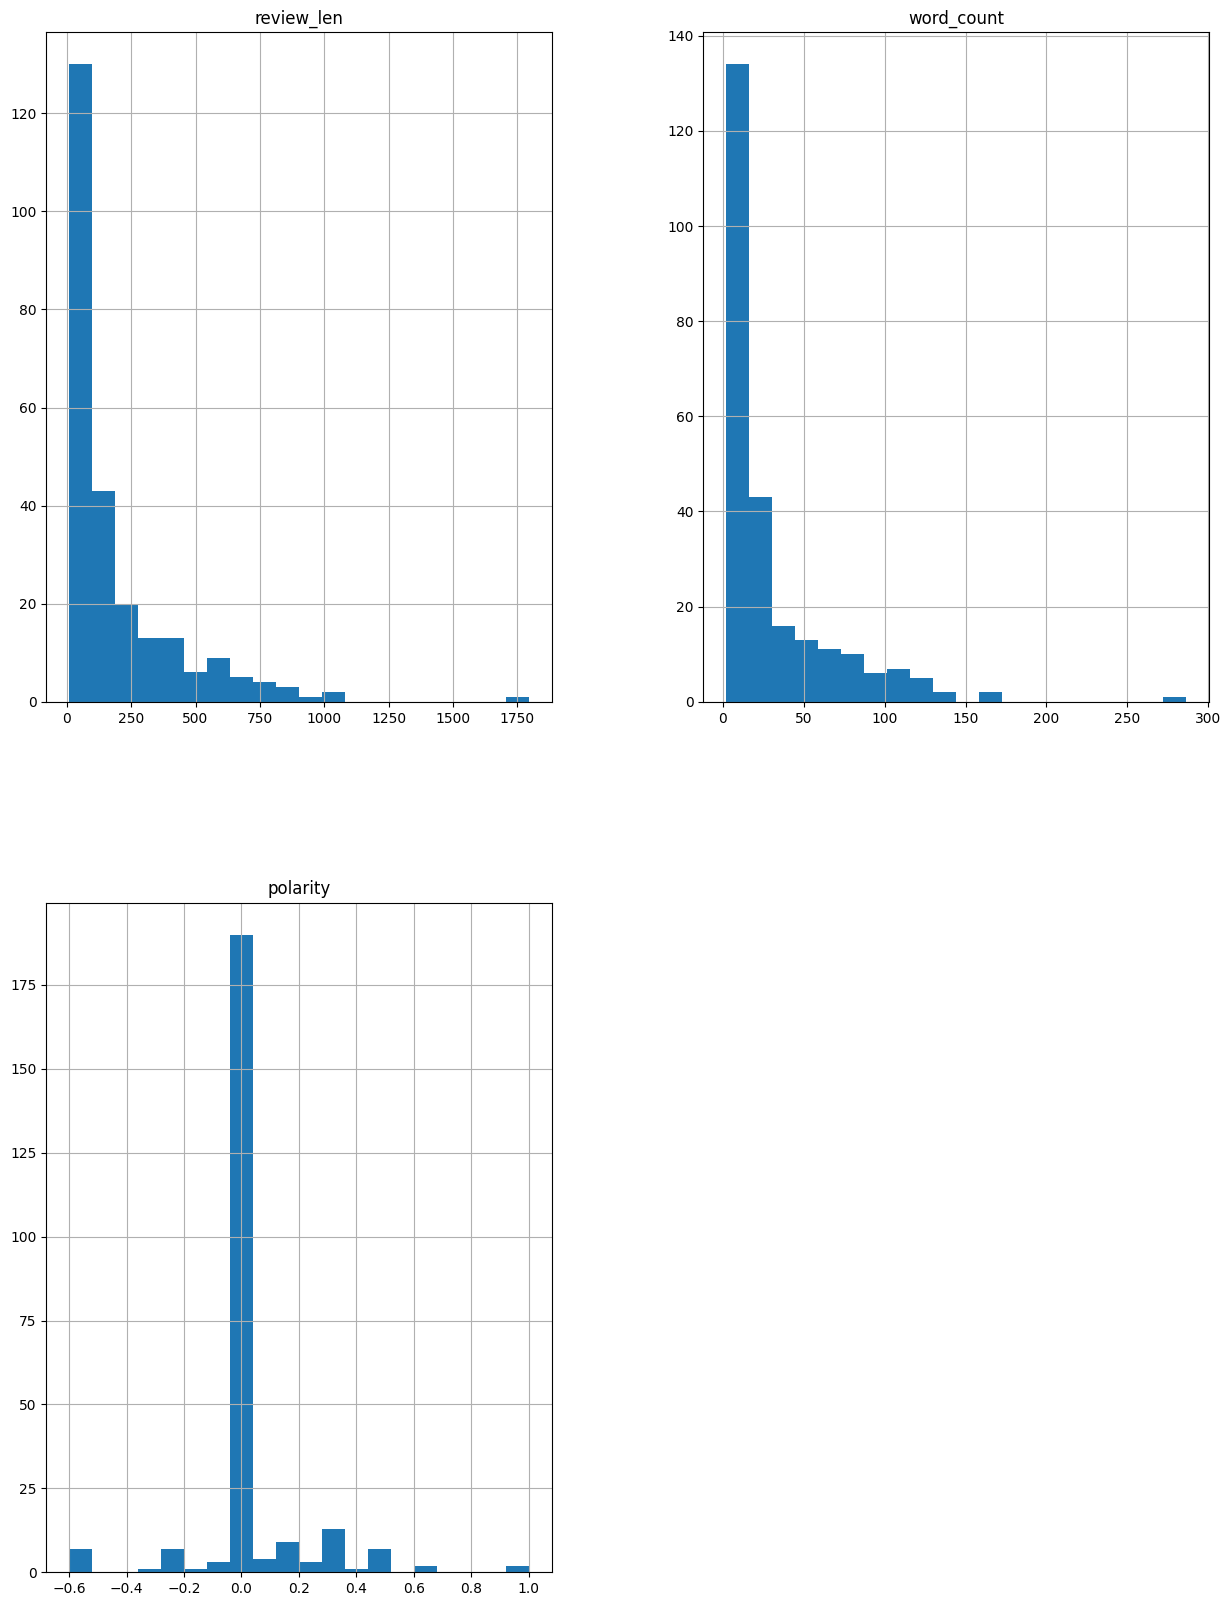

In [ ]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15,20))

The distribution of Review length and the word counts are similar as expected. The majority population lies in the lower range. Heavily right-skewed distribution there. Polarity is almost normal. The majority polarity is more than zero. That means maximum reviews have a positive sentiment

**Polarity vs Rating**

Because there is a rating column available, we should check if the polarity goes with the rating. Here are the boxplots of the polarity of each rating:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

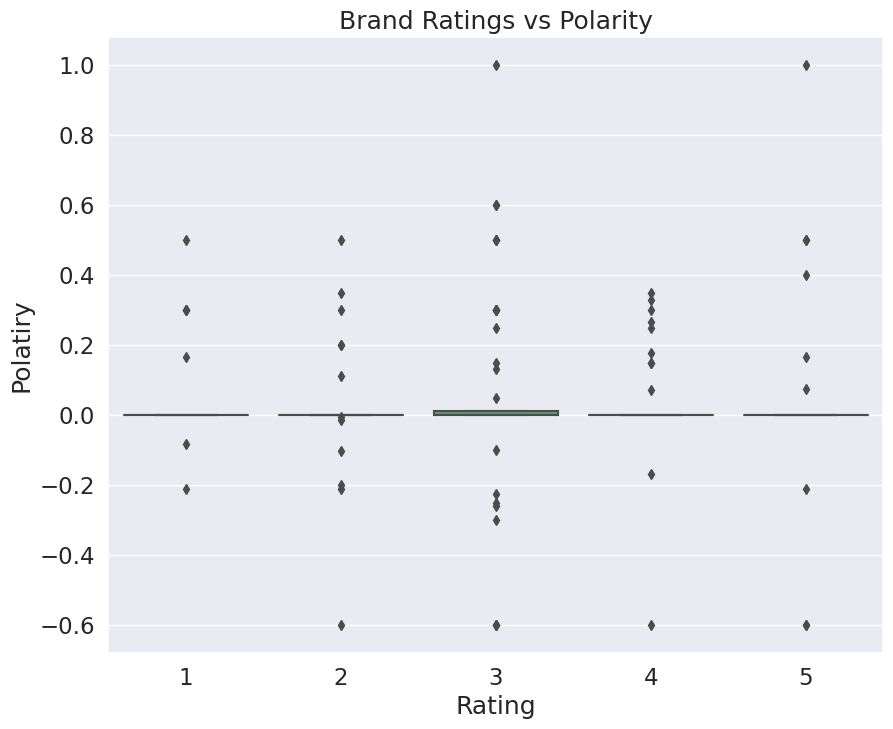

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x='Rating' , y='polarity', data=df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Brand Ratings vs Polarity")
plt.show()

Mean polarity keeps going up with the higher rating. There are a lot of outliers in rating 1 and 5 though. Maybe looking at the numbers will help a bit more.

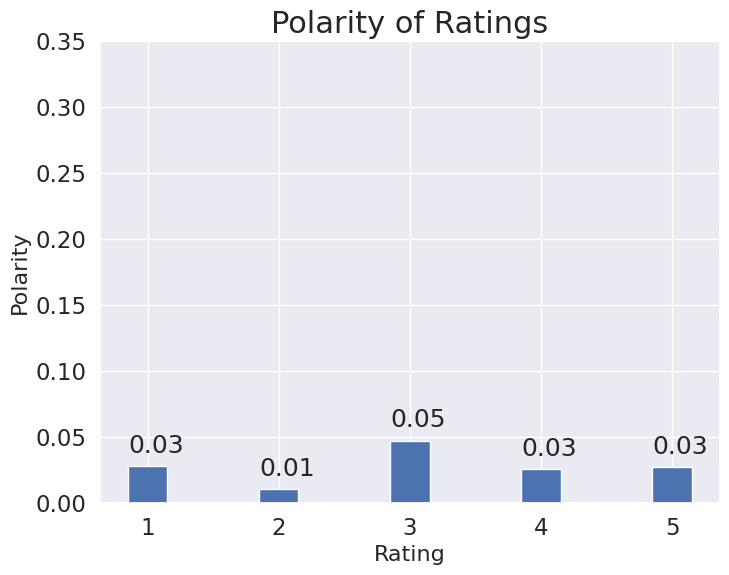

In [ ]:
mean_pol = df.groupby('Rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity , width = 0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))

plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

I was expecting ratings 1 and 2 to have a polarity of close to -1. But look like they are closer to 0. That means the review may not have that many negative words in it. I am guessing it just by looking at the polarity. Please read a few reviews of rating 1 to double-check.

**Count of the Reviews for Each Rating**

Below is a count plot that will show the count of the reviews of each rating available in the dataset.

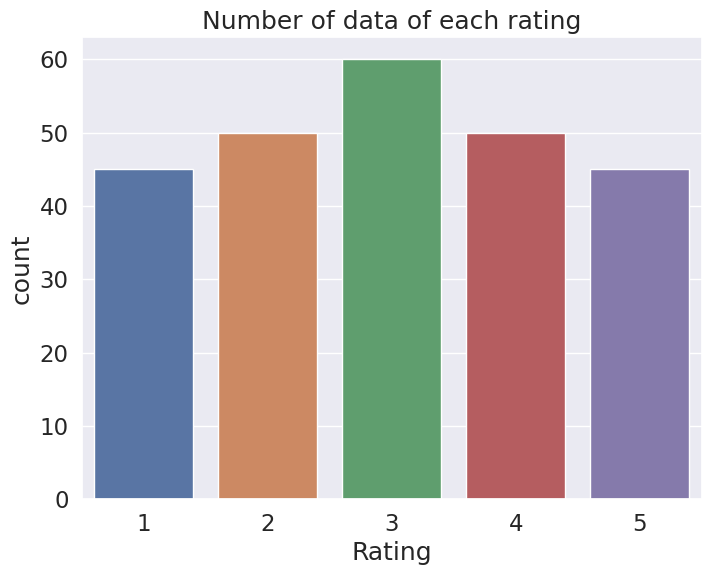

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

Most of the reviews of the dataset have a rating of 5.

**Length of the Review vs the Rating**

It will be interesting to see if the review length changes with rating.

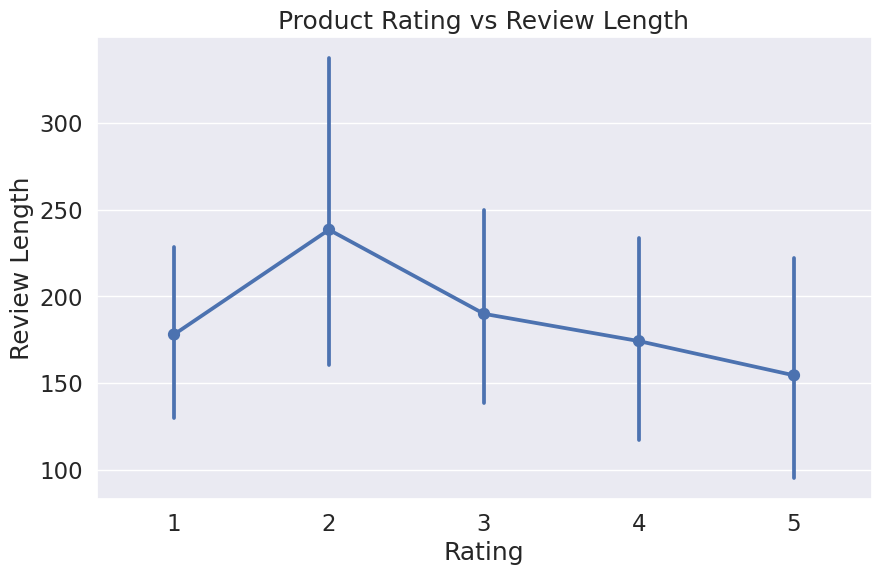

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x= 'Rating', y = 'review_len', data=df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

When the rating is 5, review length significantly goes down. So, when customers were happy, they didn’t write too much!

**Top 20 products based on the Polarity**

These are the top 20 products based on the polarity

In [ ]:
product_pol = df.groupby('Brand')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
product_pol = product_pol.head(20)
product_pol

polarity
Brand                            
Pizza Hut Delivery       0.600000
Auntie Anne's            0.500000
Lu'Miere                 0.333333
Burger Bangor            0.255556
Bros Fried Chicken       0.200000
Sagala Kitchen           0.200000
Martabak MM              0.200000
Dcrepes                  0.183333
Carl's JR                0.183333
KFC                      0.175000
Gokana                   0.166667
Banzai!                  0.166667
Pisang Keju Mr Black     0.166667
Martabak Mertua          0.166667
Old Chang Kee            0.166667
Subway                   0.150000
Kebuli Ijab Qabul        0.133333
Golden Lamian            0.116667
Nasi Kulit Malam Minggu  0.109524
Burgushi                 0.100000

**WordCloud**

Wordcloud is a common and beautiful visualization for text data to plot the frequency of words. You may need to install wordcloud if you do not have it already, using this command:

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_positive = df.loc[df['polarity']>0]

To create the word cloud, I combined all the texts in the review1 column to made a bid text block.

In [ ]:
text = ' '.join(review for review in df_positive.review1)

Using this text block, I created the word cloud. Look before making the word cloud I get rid of some more words that I thought not necessary. If you want, you can clean it up further.

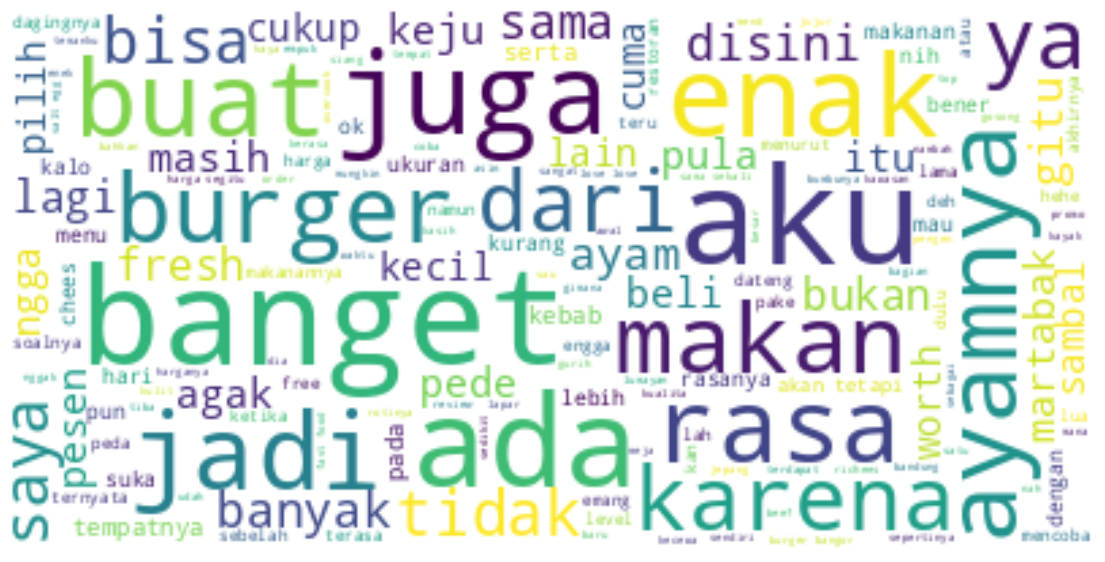

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["yg", "ga", "bgt", "pa", "kera", "sih", "nya", "krn", "kali", "yang", "di", "dan", "ke", "tapi", "mani", "untuk", "ini", "aja"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_negative = df.loc[df['polarity']<0]

In [ ]:
text = ' '.join(review for review in df_negative.review1)

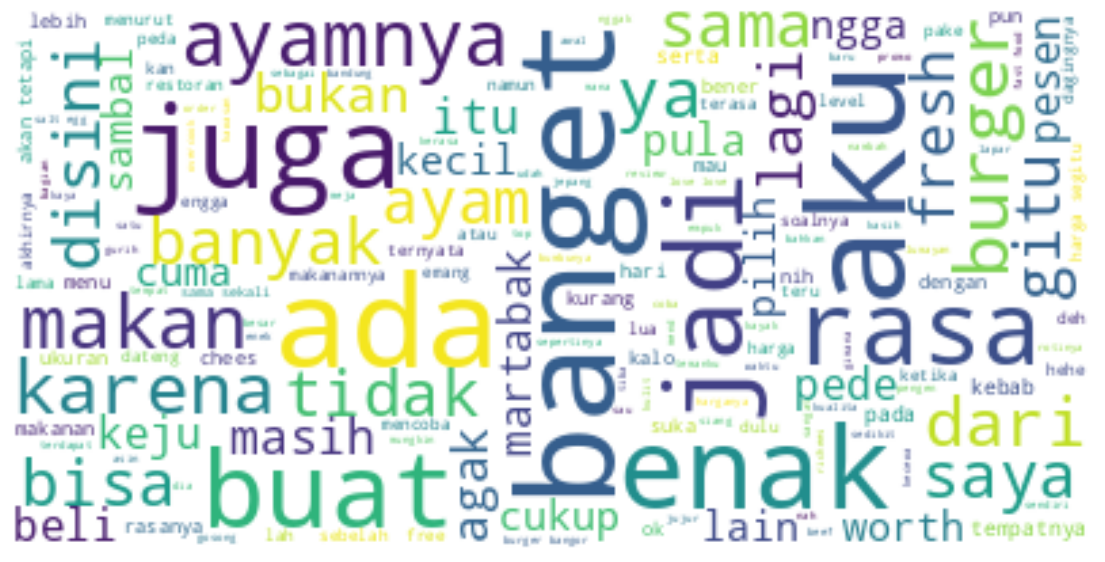

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["yg", "ga", "bgt", "pa", "kera", "sih", "nya", "krn", "kali", "yang", "di", "dan", "ke", "tapi", "mani", "untuk", "ini", "aja"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()


WordCloud semua komentar

In [ ]:
text = ' '.join(review for review in df.review1)

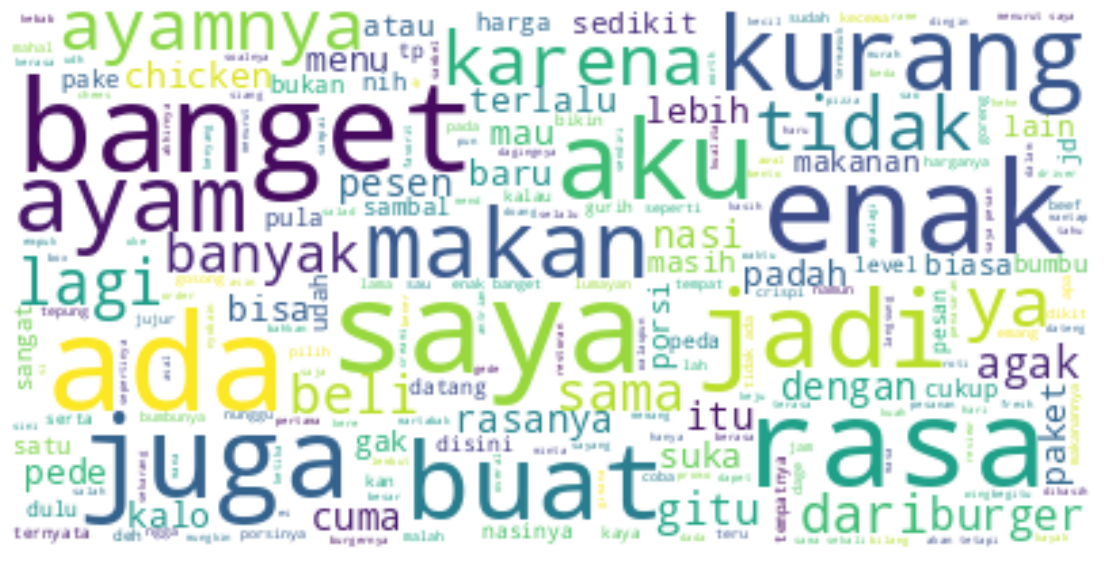

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["yg", "ga", "bgt", "pa", "kera", "sih", "nya", "krn", "kali", "yang", "di", "dan", "ke", "tapi", "mani", "untuk", "ini", "aja"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud untuk rating 3 kebawah

In [ ]:
df_reviewkurangbaik = df.loc[df['Rating']<4]

In [ ]:
text = ' '.join(review for review in df_reviewkurangbaik.review1)

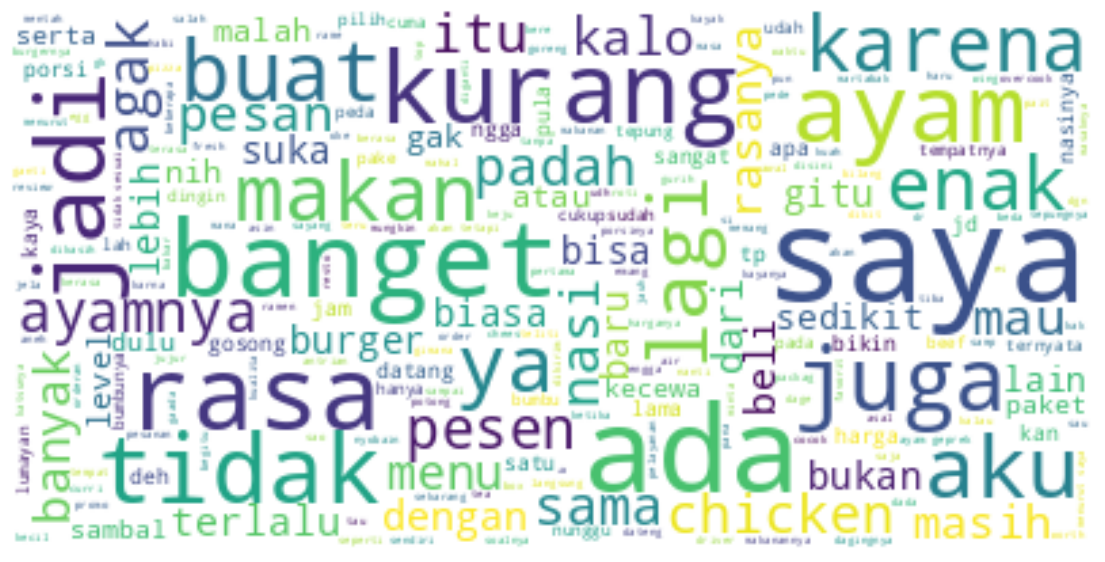

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["yg", "ga", "bgt", "pa", "kera", "sih", "nya", "krn", "kali", "yang", "di", "dan", "ke", "tapi", "mani", "untuk", "ini", "aja"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud untuk rating 4 keatas

In [ ]:
df_reviewbaik = df.loc[df['Rating']>3]

In [ ]:
text = ' '.join(review for review in df_reviewbaik.review1)

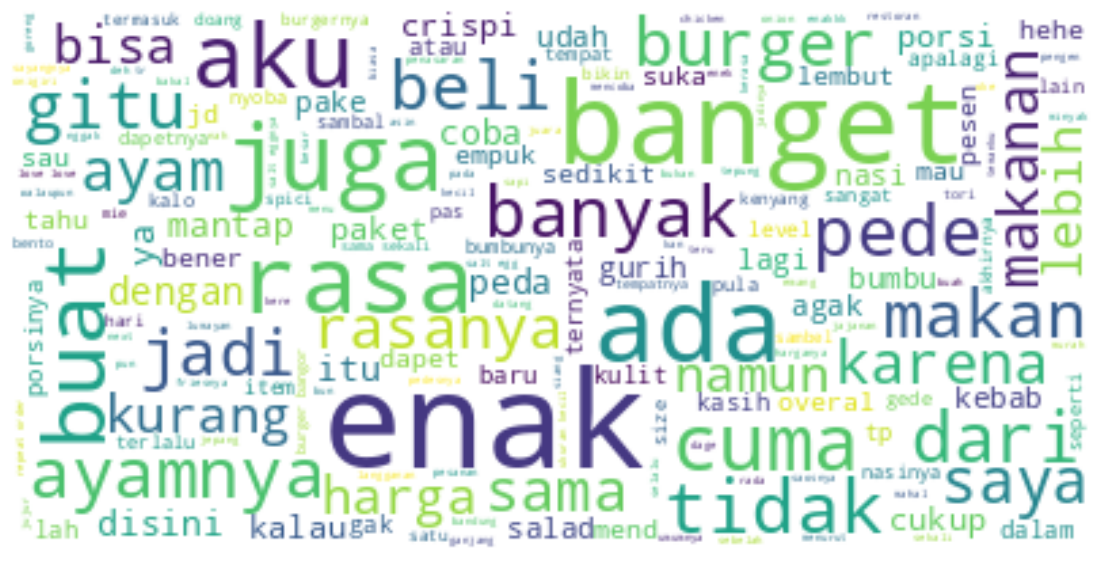

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["yg", "ga", "bgt", "pa", "kera", "sih", "nya", "krn", "kali", "yang", "di", "dan", "ke", "tapi", "mani", "untuk", "ini", "aja"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

The bigger the words that appeared more frequently in the text.

**Frequency Charts**

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the review column of the dataset. Then plot the top 20 words based on the frequency.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['review1'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

Review  count
0    dan    135
1    ini    103
2    nya    102
3     yg     97
4   yang     92

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

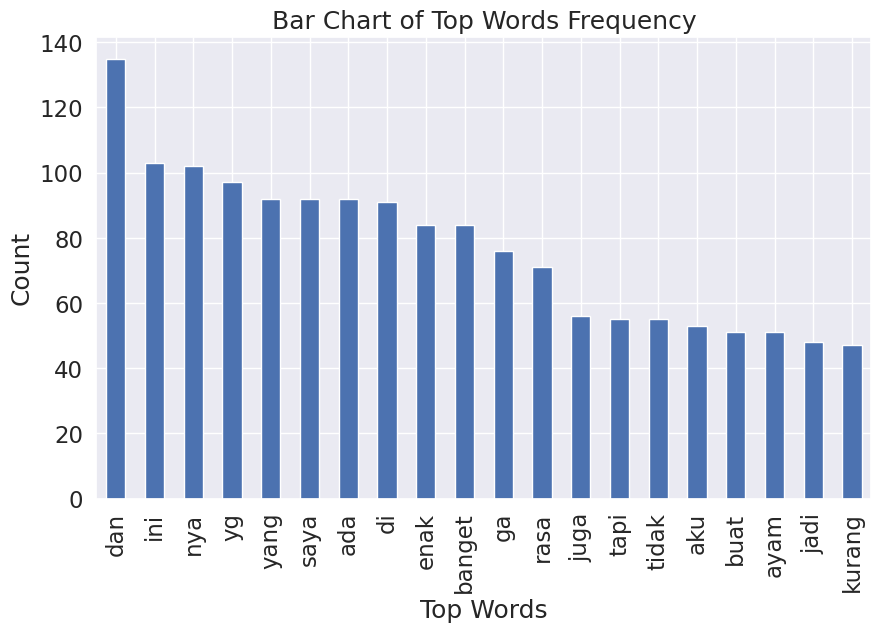

In [ ]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful. They provide some meaning. The following plot shows the topmost frequent bigrams:

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['review1'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

Review  Count
0   enak banget     13
1     tidak ada     12
2        ga ada     10
3  menurut saya      9
4   sama sekali      8

This is the bar chart of topmost occurring bigrams:

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

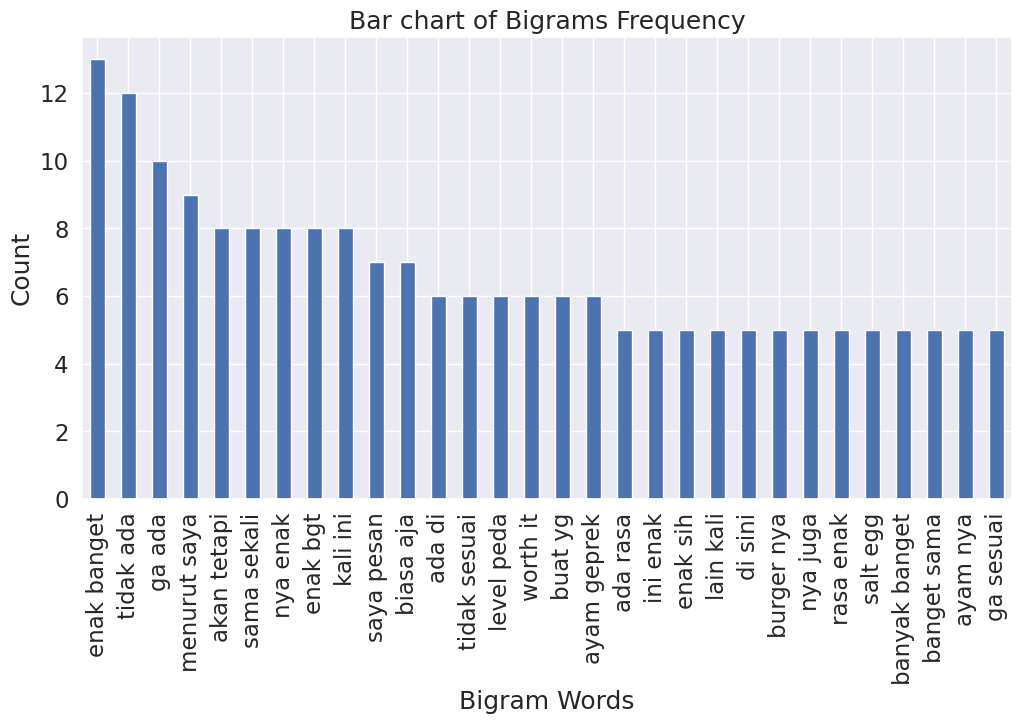

In [ ]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

Look at the bigrams. They are somewhat phrases that make more sense. The next plot is the trigrams. Maybe that will provide us some more ideas about what people are saying in the reviews.

<Axes: title={'center': 'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

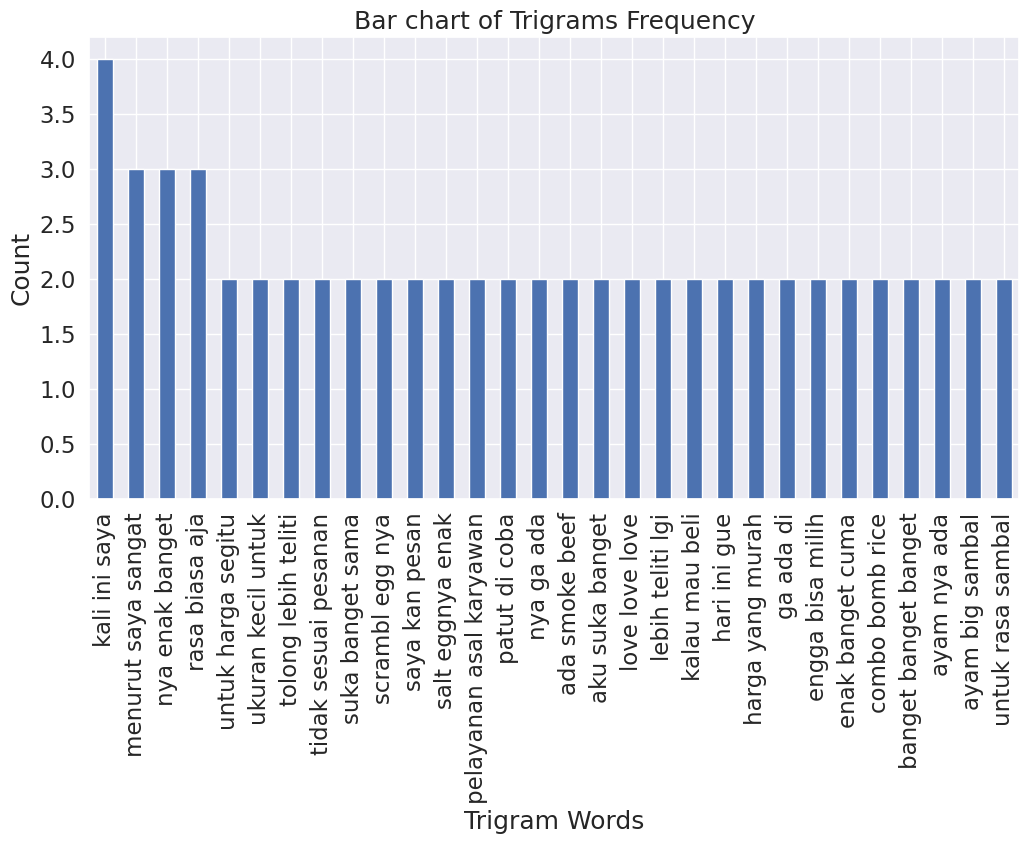

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['review1'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

**Part-of -Speech Tagging**

This is a process of tagging the words with the part of speech such as nouns, pronouns, verbs, adjectives, etc. It can be done easily using TextBlob API.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

<Axes: title={'center': 'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

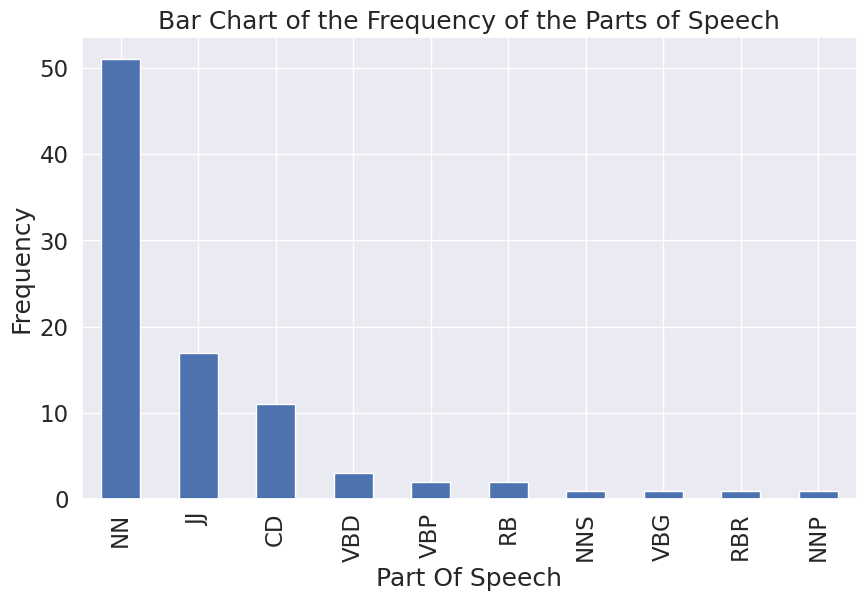

In [ ]:
blob = TextBlob(str(df['review1']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))